# CPL 5559 -B220 - CPL -Applied Project

## Libraries

In [ ]:
#!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#for database
#!python -m pip install "pymongo[srv]"
from pymongo import MongoClient
import json

In [ ]:
#for other pyhon modules
import import_ipynb

In [ ]:
import DEF_MFS_MVP_Storage as mDB

## Week 3

## Python Classes

### Define Class to input tickers

In [ ]:
class Ticker:
    
    def get_tickername(self):
        ticker_number=int(input("Enter number of tickers you want"))
        tickers=[]
        for i in range(ticker_number):
            ticker=input("Enter ticker symbol:")
            tickers.append(ticker)
        tickers=" ".join(tickers)
        return tickers
    

### Define class for yahoo finance

In [ ]:
class yfinance:
    
    #constructor to initialize instance variables
    def __init__(self,ticker, start_date,end_date):
        #ticker: stock ticker symbol
        #star_date : start date from when the stock prices is to be extracted
        #end_date : final date upto which the stock prices is to be extracted
        self.ticker=ticker
        self.start=start_date
        self.end=end_date
        
    #instance method to extract stock prices of a any one ticker
    def get_stockmarketdata_indv(self):
        # for individual ticker we use the yf.ticker module
        #yf.Ticker to create a ticker object for a particular ticker
        stock = yf.Ticker(self.ticker)
        #print(stock.info)
        #.history to get historical market data
        stock_df = stock.history(period='1d',start=self.start, end=self.end,actions=False)
        #period ='1d' means we want to extract stock market data once every day between the specified dates
        return stock_df
    
    #instance method to extract stock prices for all specified tickers
    def get_stockmarketdata_all(self):
        #To download the historical data for multiple tickers at once you can use the download module.
        #converting to string
        merged_stock_df = yf.download(self.ticker,period='1d', start=self.start, end=self.end,group_by='tickers')
        return merged_stock_df

        

### Define Class for Displaying and Saving Outputs

In [ ]:
class output:
    #class for displaying output and saving files
    def __init__(self,value,output_name):
        self.value=value
        self.name=output_name
        
    def output_print(self):
        #this function will print values, list, arrays and others
        print(self.value)
        
    def output_display(self):
        #this function will display pandas dataframe as a table
        display(self.value)
        
    def output_savecsv(self):
        #this functuion will save output as csv
        self.value.to_csv(self.name+".csv")
    
    def output_plot(self):
        #this function will make a line plot of all the stock market data
        open_close=self.value
        open_close.reset_index(inplace=True)
        open_close.plot(x="Date", y=["Open","Close"],figsize=(12, 12))
        plt.title("Line plot for open and closed stock market prices for : "+ self.name,fontsize=20)
        plt.xlabel("Date",fontsize=15)
        plt.ylabel("Stock market Data",fontsize=15)
        plt.show()
        

## Main


In [ ]:
#initialize start and end date
start_date = "2021-01-01"
end_date = "2022-12-31"

### Tesla stock prices

In [ ]:
#define a class object
tesla_Data = yfinance("TSLA", start_date, end_date)


In [ ]:
#extract stock data by calling the class's instance method
Tesla=tesla_Data.get_stockmarketdata_indv()

In [ ]:
type(Tesla)

In [ ]:
#show stock data in tabular form by calling class's instance method
Tesla_output=output(Tesla,"Tesla")
Tesla_output.output_display()

In [ ]:
#show lineplot for open and close values
Tesla_output.output_plot()

In [ ]:
#save to csv
Tesla_output.output_savecsv()

### Ford Stock Prices

In [ ]:
#define class object for Ford
ford_Data = yfinance("F", start_date, end_date)

In [ ]:
#extract stock data
Ford=ford_Data.get_stockmarketdata_indv()

In [ ]:
#show stock data in tabular form by calling class's instance method
Ford_output=output(Ford,"Ford")
Ford_output.output_display()

In [ ]:
#show lineplot for open and close values
Ford_output.output_plot()

In [ ]:
#save stock prices to csv
Ford_output.output_savecsv()

### Stock Prices for both Tesla and Ford

In [ ]:
#input tickers using the Ticker class
Tick=Ticker()
tickers=Tick.get_tickername()
print(tickers)

In [ ]:
#define a class object
tesla_ford_Data = yfinance(tickers, start_date, end_date)

In [ ]:
#extract stock data
Tesla_Ford=tesla_ford_Data.get_stockmarketdata_all()

In [ ]:
#show stock data in tabularTesla_Ford form by calling class's instance method
Tsla_ford_output=output(Tesla_Ford,"Tesla_Ford")
Tsla_ford_output.output_display()

In [ ]:
#save stock prices to csv
Tsla_ford_output.output_savecsv()

## Week 4

### Create database, store data to database and fetch data from database

#### Tesla

In [ ]:
#define class object
mongoDB=mDB.MongoDbAtlas()

In [ ]:
#retrive username, password and host_address from JSON
username,password,host_address=mongoDB.fetch_creds("DEF-MFS-MVP-Configuration.JSON")
#use the retrived credentials to connect to mongoDB database
mongoDB.connect_database(username,password,host_address)
#create database and collection


In [ ]:
#Tesla_collection
Tesla_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Tesla")

In [ ]:
Tesla_collection

In [ ]:
#store the stock price data into the database
mongoDB.store_stockdata(Tesla,Tesla_collection)

Backend at MongoDb Atlas 

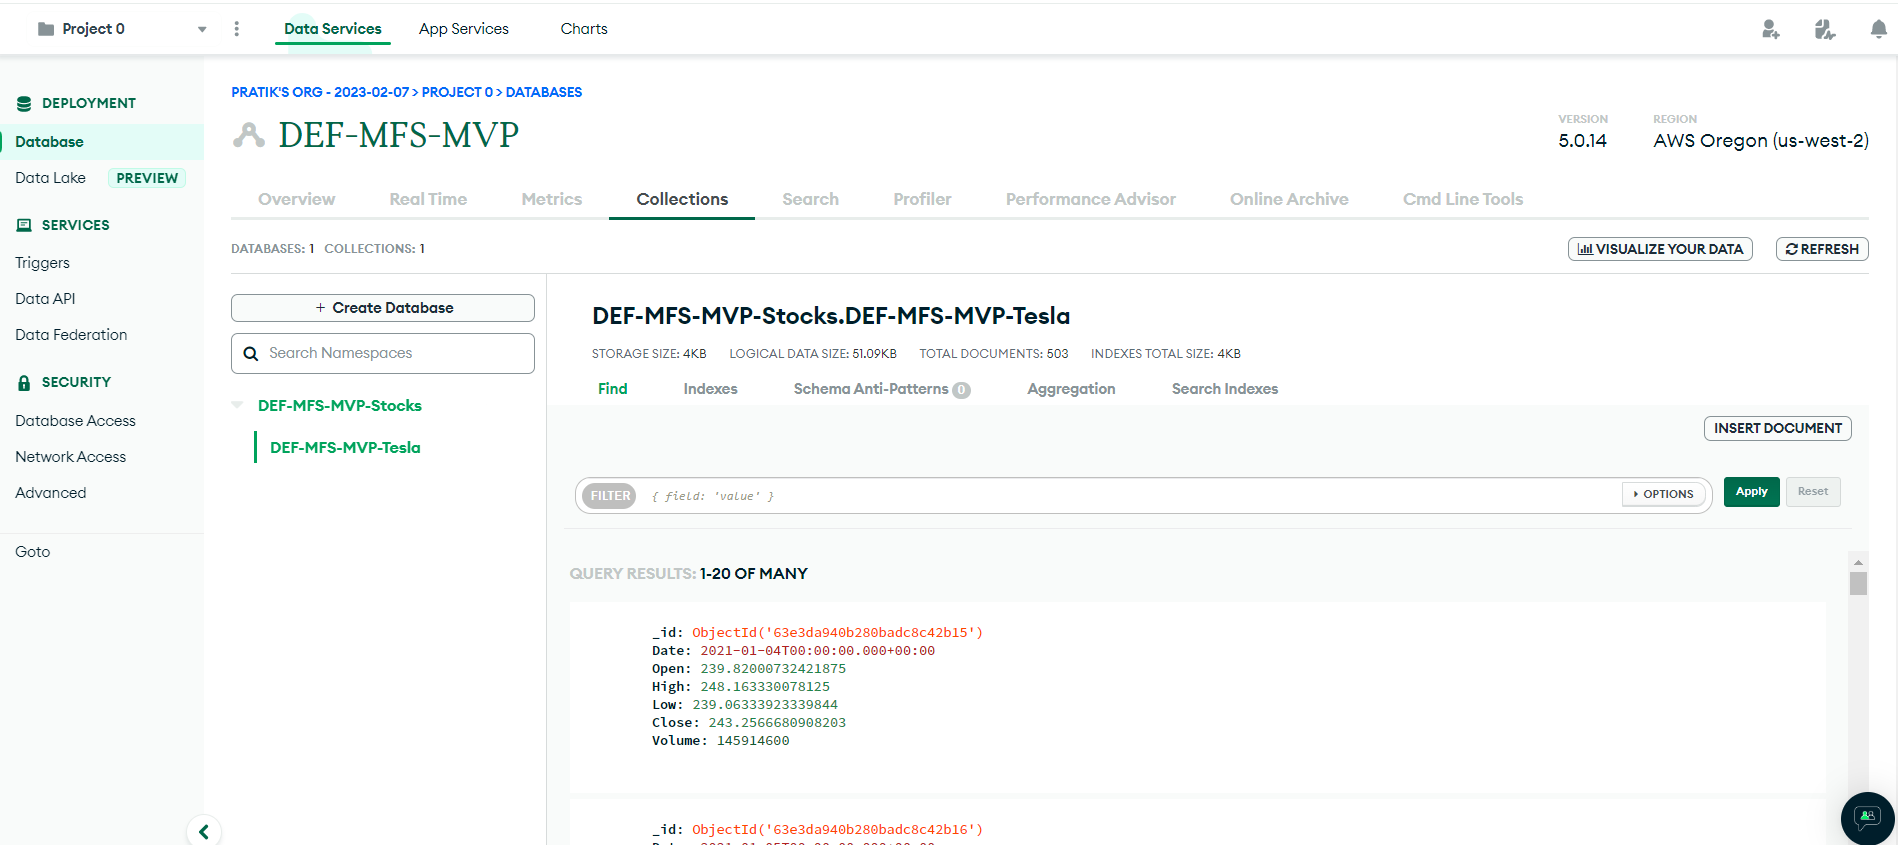

In [ ]:
#retrive stock markey data as list of dictionaries and dataframe
dic_from_db_tesla,df_from_db_tesla=mongoDB.fetch_dbdata(Tesla_collection)

In [ ]:
#dic_from_db

In [ ]:
#df_from_db

In [ ]:
#we use output class
#display the extracted stock market data from MongoDB in a DICTIONARY STRUCTURE
op=output(dic_from_db_tesla,Tesla)
#op.output_display()

In [ ]:
#display the extracted stock market data from MongoDB in a tabular structure.#we use output class
op=output(df_from_db_tesla,Tesla)
op.output_display()

#### Ford

In [ ]:
#create a new collection for ford
Ford_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Ford")

In [ ]:
#store ford stpock market data into database
mongoDB.store_stockdata(Ford,Ford_collection)

Backend at MongoDb Atlas Database

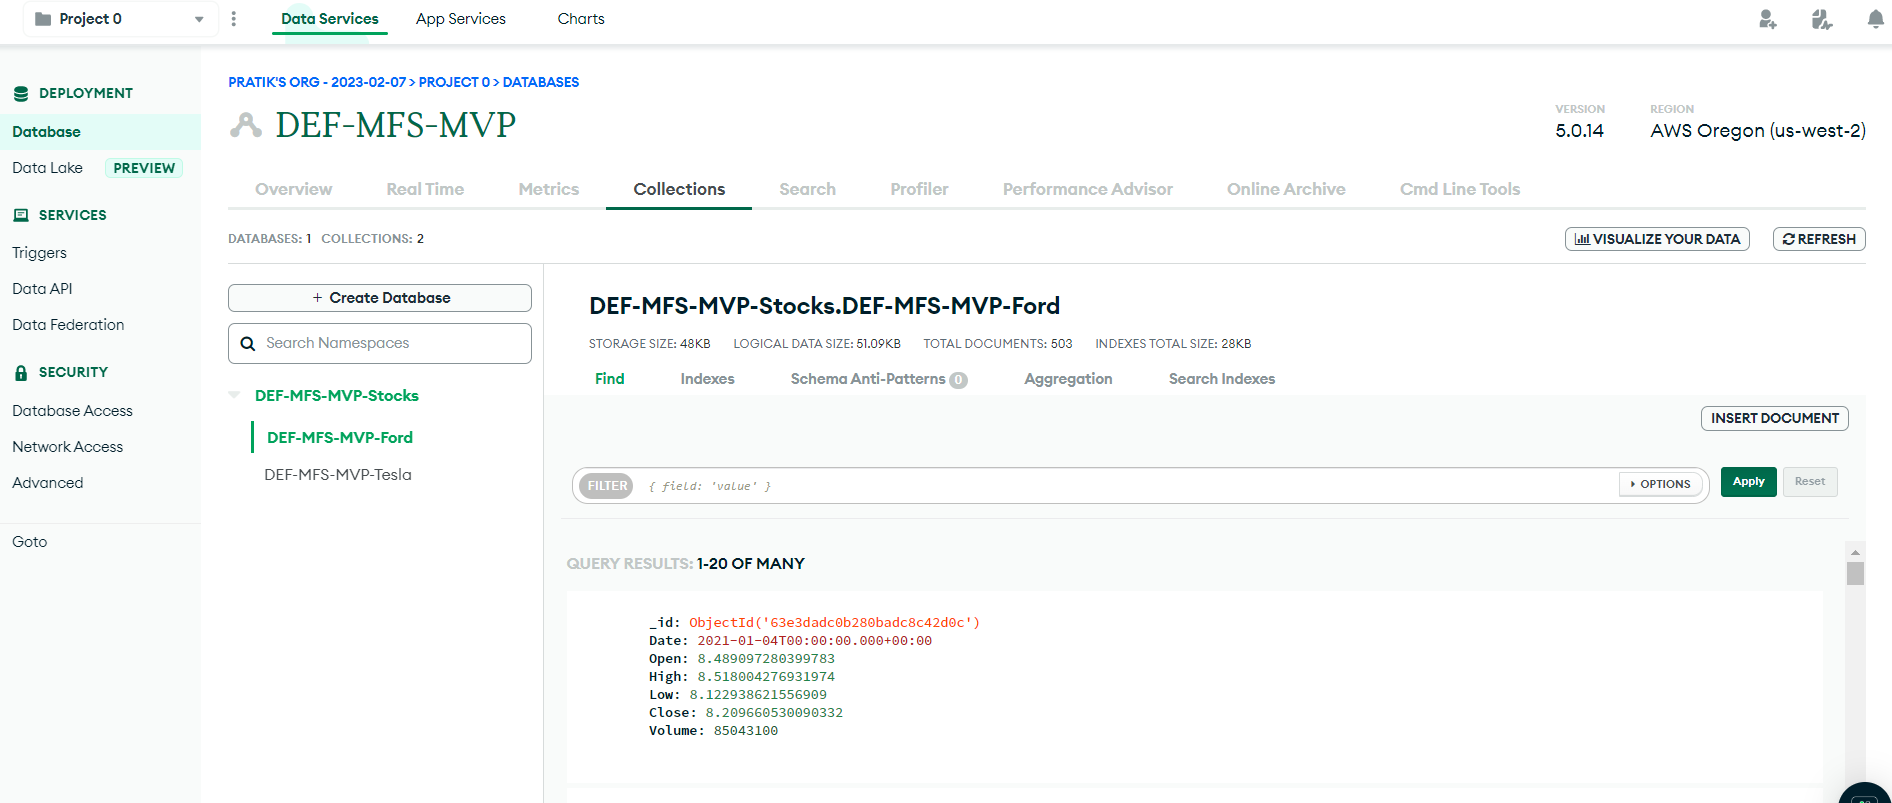

In [ ]:
#retrive stock market data of Ford as list of dictionaries and dataframe
dic_from_db_ford,df_from_db_ford=mongoDB.fetch_dbdata(Ford_collection)

In [ ]:
#display the extracted stock market data from MongoDB in a DICTIONARY STRUCTURE
op=output(dic_from_db_ford,Ford)
#op.output_display()

In [ ]:
#display the extracted Ford stock market data from MongoDB in a tabular structure.
#we use output class
op=output(df_from_db_ford,Ford)
op.output_display()

## Week 5

## Statistical Analysis and Visualization

### Retrieve data from database

In [ ]:
#for database
#!python -m pip install "pymongo[srv]"
from pymongo import MongoClient
import json

In [ ]:
#for other python modules to main module/file
import import_ipynb

In [ ]:
import DEF_MFS_MVP_Storage as storage_module

In [ ]:
#define class object for mongoDB storage module class
mongoDB=storage_module.MongoDbAtlas()

In [ ]:
#connect to database

#### For Tesla

In [ ]:
#retrive username, password and host_address from JSON
username,password,host_address=mongoDB.fetch_creds("DEF-MFS-MVP-Configuration.JSON")
#use the retrived credentials to connect to mongoDB database
mongoDB.connect_database(username,password,host_address)
#connect to tesla database and collection
Tesla_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Tesla")

In [ ]:
Tesla_collection

In [ ]:
#this is the database we connected to in backend

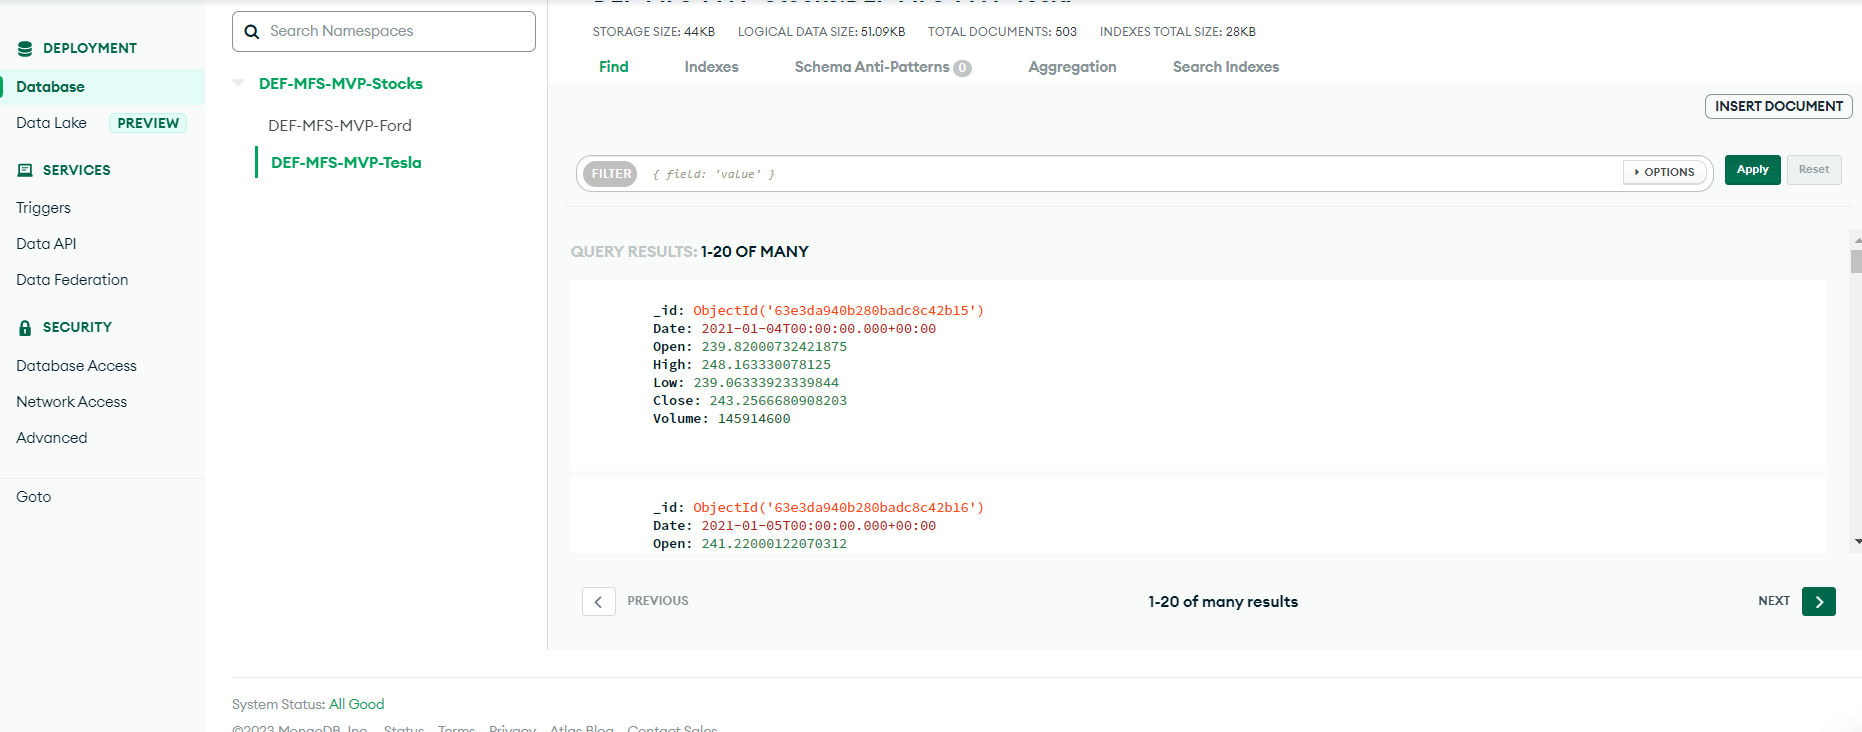

In [ ]:
#retrive stock market data as list of dictionaries and dataframe
#this class was explained in previous task


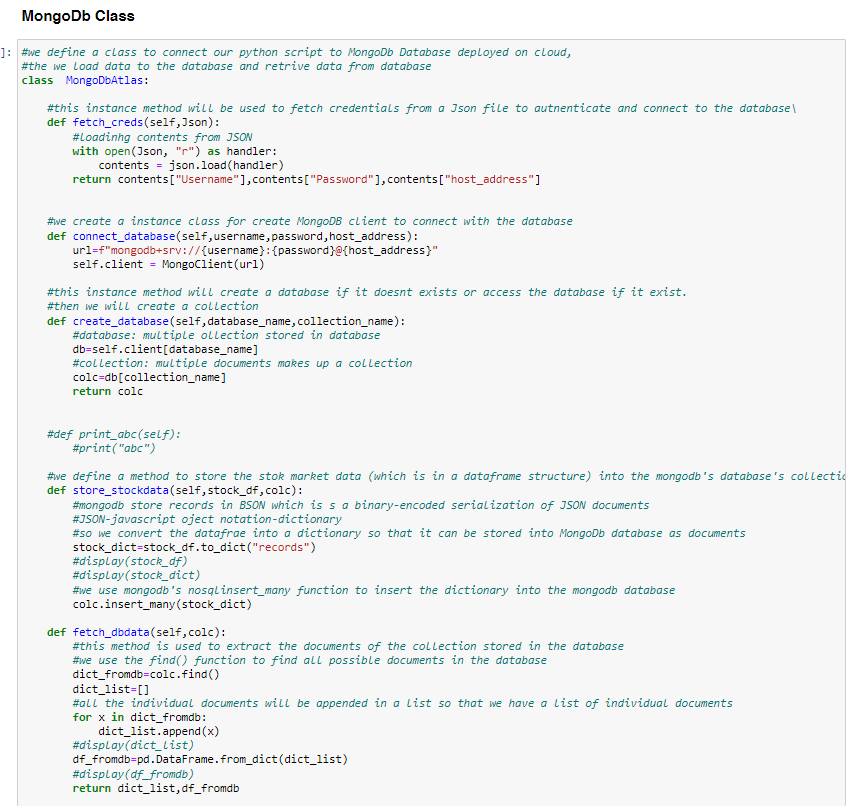

In [ ]:
dic_from_db_tesla,df_from_db_tesla=mongoDB.fetch_dbdata(Tesla_collection)

In [ ]:
df_from_db_tesla

#### For Ford Data


In [ ]:
#access database and collection for ford
Ford_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Ford")

In [ ]:
#fetch data from ford collection
dic_from_db_ford,df_from_db_ford=mongoDB.fetch_dbdata(Ford_collection)

In [ ]:
df_from_db_ford

### Statistical Analysis

We'll be using the DEF_MFS_MVP_StatisticalAnalysis.ipynb to perform statistical analysis on our data and find any anomolies in the data.

In [ ]:
#importying StatisticalAnalysis module on our main DEF_MFS_MVP file
import DEF_MFS_MVP_StatisticalAnalysis as statistical_module

In [ ]:
#create a class object to find outliers and missing values
anom=statistical_module.Find_Anomolies(df_from_db_tesla)
anom

#### Finding Null Values

In [ ]:
#we use check_null() function of Find_Anomolies class to check for any missing values
anom.check_null()

#### From the above analysis, we see that there arent any missing values or Nan values in our stock market data.

#### Finding Outliers

In [ ]:
#first we define the target features for which we will compute the outliers for
#our list of target features are
target_features=[ 'Open', 'High', 'Low', 'Close', 'Volume']
target_features

In [ ]:
#find outliers for each target features
for i in target_features:
    anom.check_outliers(i)

#### Compute Statistical Characters

#### OPEN

In [ ]:
#we create class object for Statistical_character class to perform statistical analysis on different target features of our stock market data
OPEN=statistical_module.Statistical_character(df_from_db_tesla,"Open")
#describe feature target values
OPEN.calculate_statistic()

In [ ]:
#calculate minimum values
OPEN.calculate_min()
#calculate maximum values
OPEN.calculate_max()
#calculate range
OPEN.calculate_range()
#calculate mean of Open values
OPEN.calculate_mean()
#calculate median
OPEN.calculate_median()
#calculate variance
OPEN.calculate_variance()
#calculate standard deviation
OPEN.calculate_stddev()

In [ ]:
#statistical character in tabular structure
OPEN.stats_table()

In [ ]:
#we define a function to compute statistical values for each target features

def Descriptive_Statistics(target_feature,data_frame):
    #we create class object for Statistical_character class to perform statistical analysis on different target features of our stock market data
    stat=statistical_module.Statistical_character(data_frame,target_feature)
    #describe feature target values
    stat.calculate_statistic()
    #calculate minimum values
    stat.calculate_min()
    #calculate maximum values
    stat.calculate_max()
    #calculate range
    stat.calculate_range()
    #calculate mean 
    stat.calculate_mean()
    #calculate median
    stat.calculate_median()
    #calculate variance
    stat.calculate_variance()
    #calculate standard deviation
    stat.calculate_stddev()
    #statistical character in tabular structure
    stat.stats_table()

#### Open

In [ ]:
Descriptive_Statistics("Open",df_from_db_tesla)

#### Close

In [ ]:
Descriptive_Statistics("Close",df_from_db_tesla)

#### High

In [ ]:
Descriptive_Statistics("High",df_from_db_tesla)

#### Low

In [ ]:
Descriptive_Statistics("Low",df_from_db_tesla)

#### Volume

In [ ]:
Descriptive_Statistics("Volume",df_from_db_tesla)

#### Similarly for Ford

In [ ]:
#create a class object to find outliers and missing values
anom_F=statistical_module.Find_Anomolies(df_from_db_ford)
anom_F

In [ ]:
#finding outliers for ford stock market prices
#we use check_null() function of Find_Anomolies class to check for any missing values
anom_F.check_null()

In [ ]:
#find outliers for each target features
for i in target_features:
    anom_F.check_outliers(i)

In [ ]:
#calculate statistical characters for FORD data

Open Prices

In [ ]:
Descriptive_Statistics("Open",df_from_db_ford)

Close Price

In [ ]:
Descriptive_Statistics("Close",df_from_db_ford)

High Price

In [ ]:
Descriptive_Statistics("High",df_from_db_ford)

Low Price

In [ ]:
Descriptive_Statistics("Low",df_from_db_ford)

Stock Volumes

In [ ]:
Descriptive_Statistics("Volume",df_from_db_ford)

### Visualization

We'll be using the DEF_MFS_MVP_Visualization.ipynb to visualize the data as time series and plot them with the x-axes as time and the y-axis as the target feature.

In [ ]:
#importying Visualization module on our main DEF_MFS_MVP file
import DEF_MFS_MVP_Visualization as visual_module

#### For Tesla Data

In [ ]:
#create a class object to find outliers through boxplots
box_plot=visual_module.Boxplot_Outliers(df_from_db_tesla)
box_plot.plot_boxplots()

Any datapoints outside the upper and lower whiskers are outliers.

In [ ]:
#create a class object to plot time series graph of our data
ts_plot=visual_module.timeseries_plot(df_from_db_tesla)
ts_plot

In [ ]:
#display timeseries plot for all the target features- OPEN,CLOSE,HIGH and LOW
ts_plot.static_lineplots_all()

In [ ]:
#display time series plot for individul target features
ts_plot.static_lineplot_indv()

In [ ]:
#display interactive plots for all stock market data price
ts_plot.interactive_lineplots_all()

In [ ]:
#display interactive line plots for CLOSE stock market price
ts_plot.interactive_lineplots_close()

#### For Ford Stock Prices

In [ ]:
#create a class object to plot time series graph of our ford data
ts_plot_F=visual_module.timeseries_plot(df_from_db_ford)
ts_plot_F

In [ ]:
#display timeseries plot for all the target features- OPEN,CLOSE,HIGH and LOW
ts_plot_F.static_lineplots_all()

In [ ]:
#display time series plot for individul target features
ts_plot_F.static_lineplot_indv()

In [ ]:
#display interactive plots for all stock market data price
ts_plot_F.interactive_lineplots_all()

In [ ]:
#display interactive line plots for CLOSE stock market price
ts_plot_F.interactive_lineplots_close()

## Week 6

## Interactive Visualization with Plotly and Dash

## Libraries

In [1]:
#to work with dataframe
import pandas as pd
#to perform mathematical and statistical calculations
import numpy as np

#for interactive graphs/visualization
#plotly express
import plotly.express as px
#plotly graphical object
import plotly.graph_objects as go
#to work with dashboards
from jupyter_dash import JupyterDash
#import dash core components
from dash import dcc
from dash.dependencies import Input,Output
#to create html objects
from dash import html

### Fetch data from persistent storage

In [2]:
#for database
#!python -m pip install "pymongo[srv]"
from pymongo import MongoClient
import json

In [3]:
#for other python modules to main module/file
import import_ipynb

In [4]:
#import storage module to main module
import DEF_MFS_MVP_Storage as storage_module

importing Jupyter notebook from DEF_MFS_MVP_Storage.ipynb


In [5]:
#define class object for mongoDB storage module class
mongoDB=storage_module.MongoDbAtlas()

In [6]:
#connect to mongodb database 
#retrive username, password and host_address from JSON
username,password,host_address=mongoDB.fetch_creds("DEF-MFS-MVP-Configuration.JSON")
#use the retrived credentials to connect to mongoDB database
mongoDB.connect_database(username,password,host_address)
#connect to tesla database and collection
#for Tesla database
Tesla_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Tesla")

In [7]:
dic_from_db_tesla,df_from_db_tesla=mongoDB.fetch_dbdata(Tesla_collection)

In [ ]:
dic_from_db_tesla

In [8]:
df_from_db_tesla

_id       Date        Open        High         Low  \
0    63f68ef66d7d6e5cb7e3b996 2021-01-04  239.820007  248.163330  239.063339   
1    63f68ef66d7d6e5cb7e3b997 2021-01-05  241.220001  246.946671  239.733337   
2    63f68ef66d7d6e5cb7e3b998 2021-01-06  252.830002  258.000000  249.699997   
3    63f68ef66d7d6e5cb7e3b999 2021-01-07  259.209991  272.329987  258.399994   
4    63f68ef66d7d6e5cb7e3b99a 2021-01-08  285.333344  294.829987  279.463318   
..                        ...        ...         ...         ...         ...   
498  63f68ef66d7d6e5cb7e3bb88 2022-12-23  126.370003  128.619995  121.019997   
499  63f68ef66d7d6e5cb7e3bb89 2022-12-27  117.500000  119.669998  108.760002   
500  63f68ef66d7d6e5cb7e3bb8a 2022-12-28  110.349998  116.269997  108.239998   
501  63f68ef66d7d6e5cb7e3bb8b 2022-12-29  120.389999  123.570000  117.500000   
502  63f68ef66d7d6e5cb7e3bb8c 2022-12-30  119.949997  124.480003  119.750000   

          Close     Volume  
0    243.256668  145914600  
1    245.036667   96735600  
2    251.993332  134100000  
3    272.013336  154496700  
4    293.339996  225166500  
..          ...        ...  
498  123.150002  166989700  
499  109.099998  208643400  
500  112.709999  221070500  
501  121.820000  221923300  
502  123.180000  157304500  

[503 rows x 7 columns]

In [9]:
#for ford database
Ford_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Ford")

In [10]:
dic_from_db_ford,df_from_db_ford=mongoDB.fetch_dbdata(Ford_collection)
df_from_db_ford

_id       Date       Open       High        Low  \
0    63f68efb6d7d6e5cb7e3bb8d 2021-01-04   7.985667   8.012860   7.641223   
1    63f68efb6d7d6e5cb7e3bb8e 2021-01-05   7.677481   7.904089   7.668416   
2    63f68efb6d7d6e5cb7e3bb8f 2021-01-06   7.967539   8.103503   7.867831   
3    63f68efb6d7d6e5cb7e3bb90 2021-01-07   8.103502   8.230403   8.049117   
4    63f68efb6d7d6e5cb7e3bb91 2021-01-08   8.248532   8.284789   8.058181   
..                        ...        ...        ...        ...        ...   
498  63f68efb6d7d6e5cb7e3bd7f 2022-12-23  10.601654  10.723943  10.554619   
499  63f68efb6d7d6e5cb7e3bd80 2022-12-27  10.611060  10.714538  10.469956   
500  63f68efb6d7d6e5cb7e3bd81 2022-12-28  10.516991  10.582840  10.253596   
501  63f68efb6d7d6e5cb7e3bd82 2022-12-29  10.422921  10.865049  10.394700   
502  63f68efb6d7d6e5cb7e3bd83 2022-12-30  10.723944  10.949712  10.714538   

         Close    Volume  
0     7.722802  85043100  
1     7.840638  70127800  
2     8.012860  72590200  
3     8.212275  77117100  
4     8.157888  59162200  
..         ...       ...  
498  10.686316  38200700  
499  10.535805  44837400  
500  10.300631  49375400  
501  10.855641  53550300  
502  10.940305  39149700  

[503 rows x 7 columns]

In [ ]:
dic_from_db_ford

### Plotly Visualizations on Jupyter Notebook

In [11]:
#import plotly visualization module to main module
import DEF_MFS_MVP_Interactive_Visualizations as plotly_module

importing Jupyter notebook from DEF_MFS_MVP_Interactive_Visualizations.ipynb


#### For Tesla

In [12]:
#we create a class object
IP=plotly_module.InteractivePlotly(df_from_db_tesla)

In [13]:
#to plot line gragh containing all target features

In [14]:
IP.interactive_line_all()

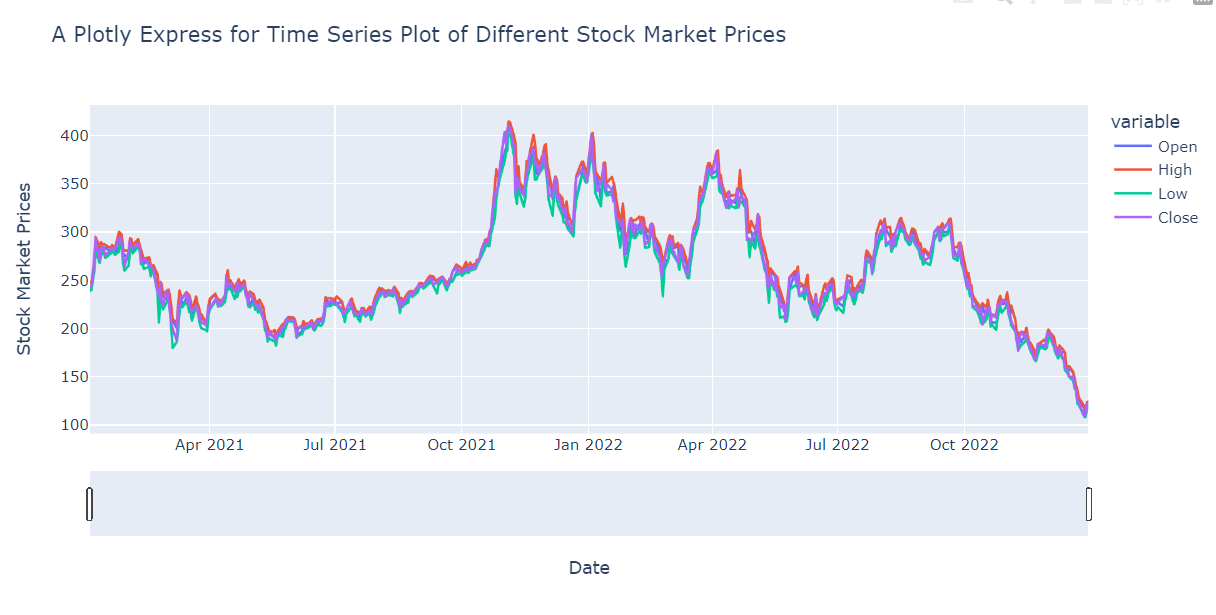

In [15]:
#to plot individual feature target
IP.interactive_line_indv()

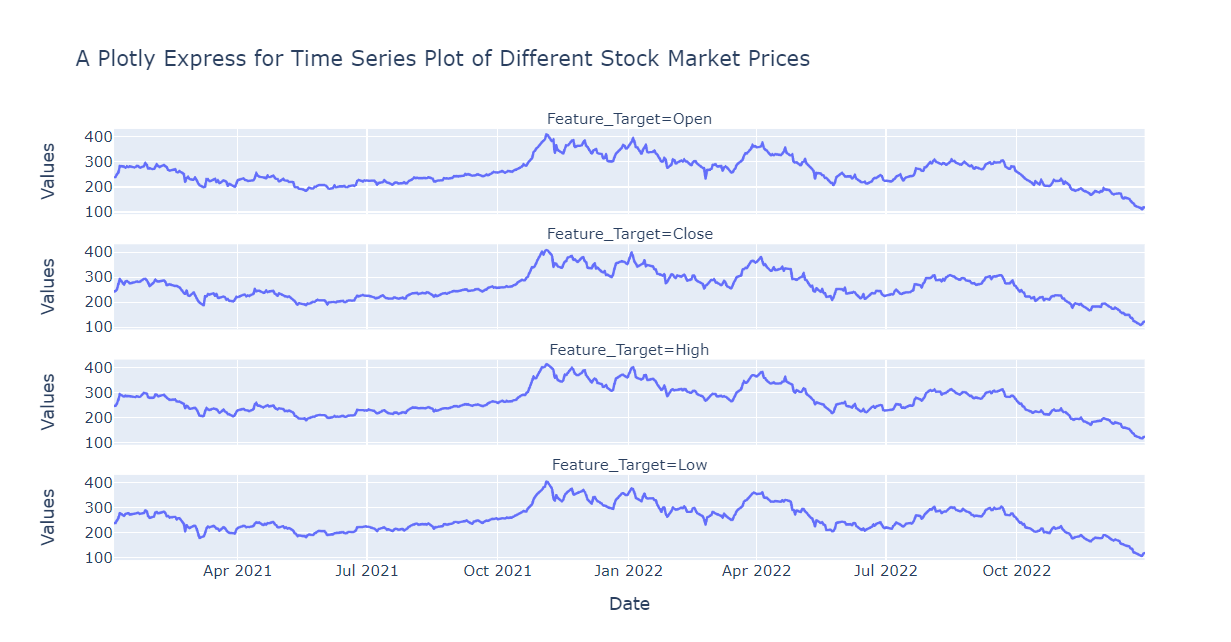

In [16]:
#plot interactive candlestick plot showing all open, high, low and close stock market values
IP.interactive_candlestick()

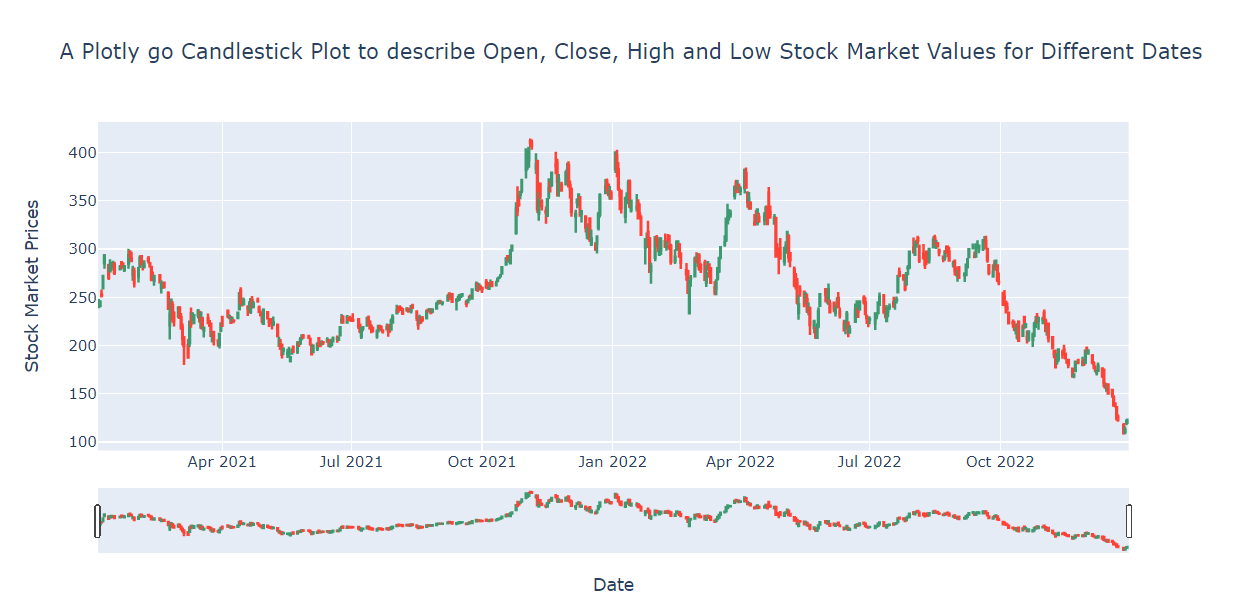

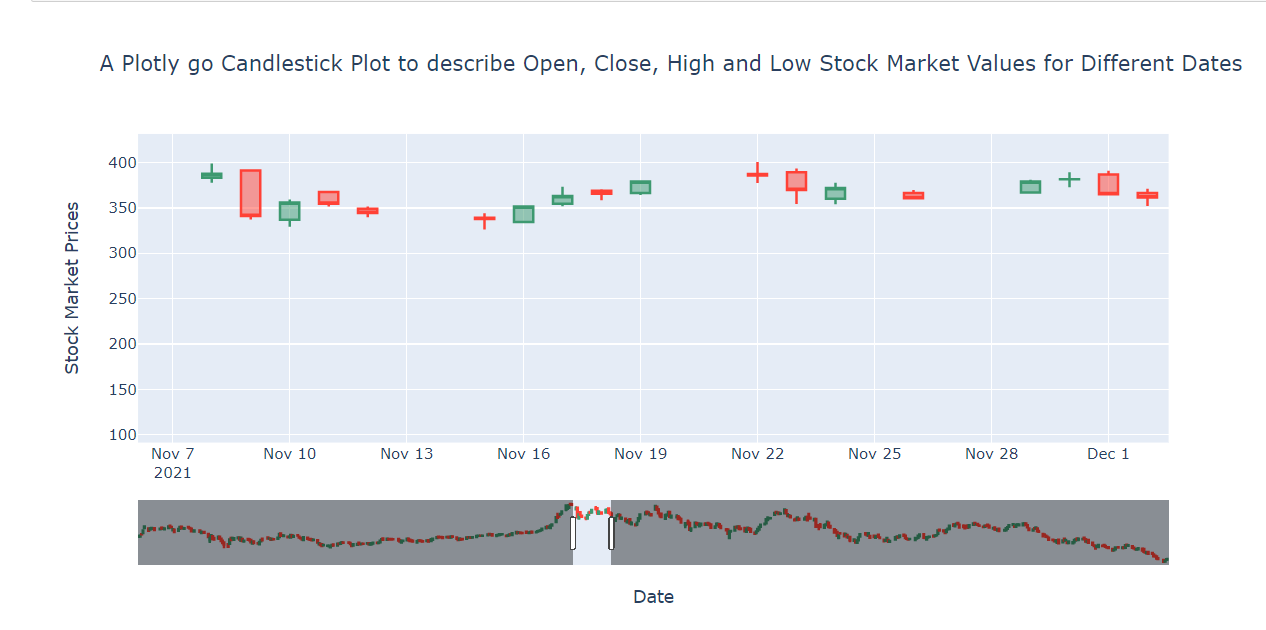

In [17]:
#plot interactive OHLC plot showing all open, high, low and close stock market values
IP.interactive_OHLC()

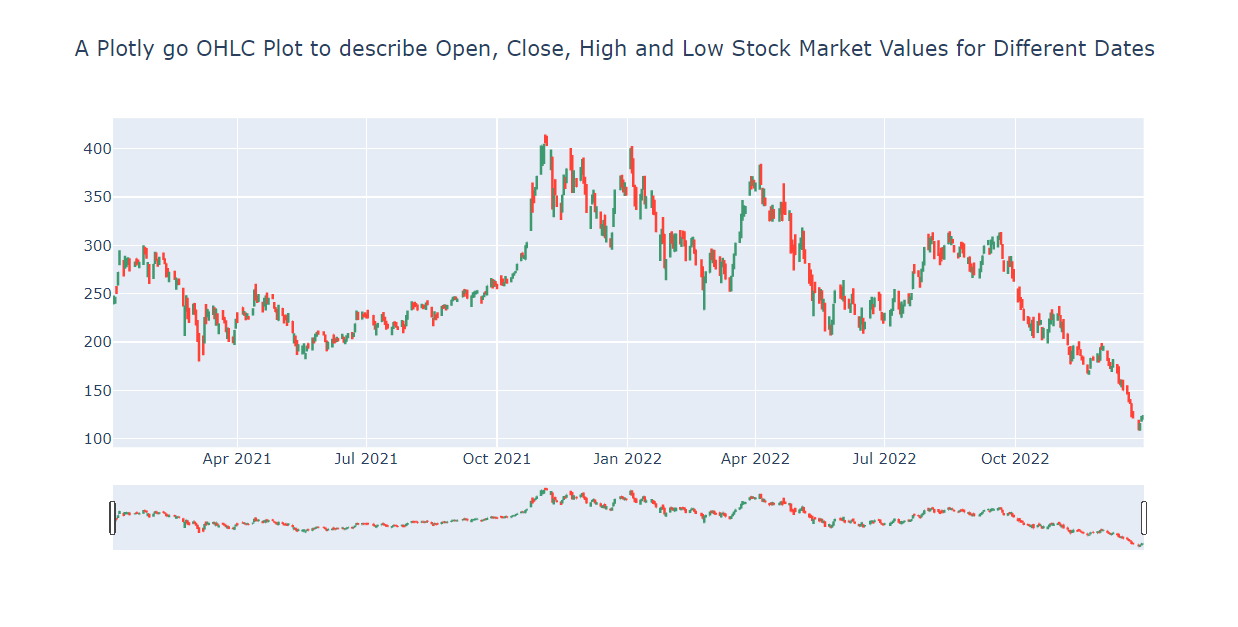

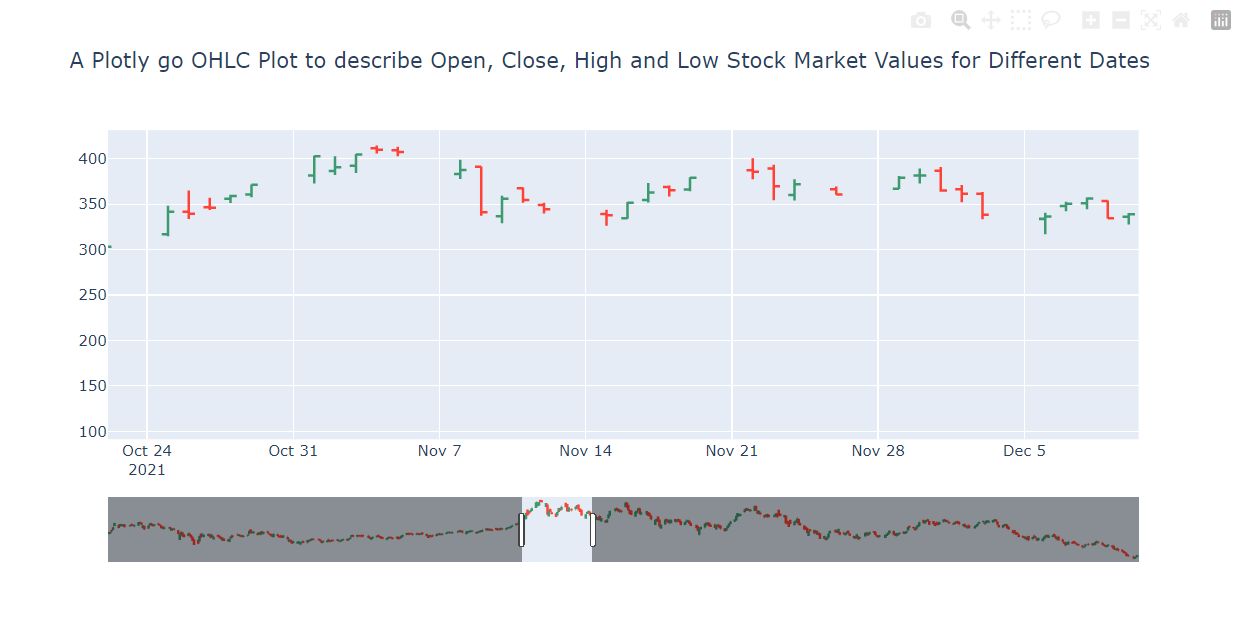

#### For Ford

In [18]:
#we create a class object
IP=plotly_module.InteractivePlotly(df_from_db_ford)

In [19]:
IP.interactive_line_all()

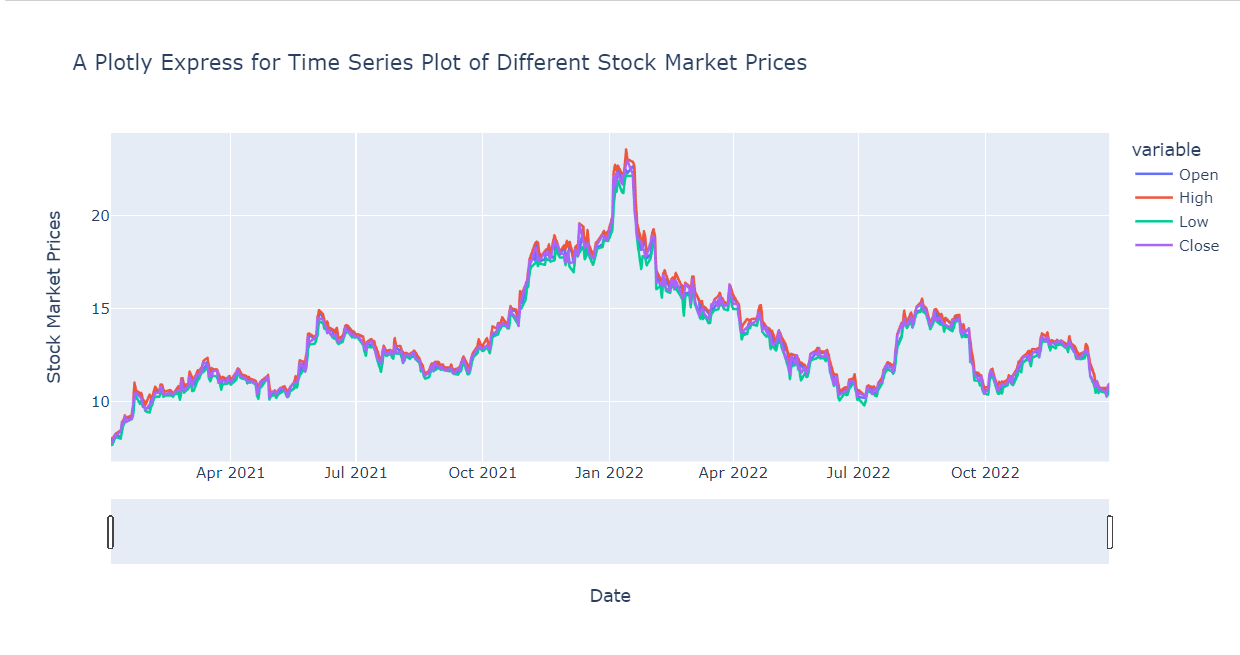

In [20]:
IP.interactive_line_indv()

In [21]:
IP.interactive_OHLC()

In [22]:
IP.interactive_candlestick()

### Plotly Visualization on Dash Dashboard with Interactive Dropdowns and Checklist

In [23]:
class Dash_Dashboard():
    #we want ti inherit the wide_to_long() function from the wideformat_to_longformat class
    
    #class constructor
    def __init__(self,dataframe):
        self.df=dataframe
        #self.feat_columns=target_features
        
        
    #this instance method is used to create simple lineplots on dash dashboard
    def Dash_lineplot(self):
        #constructor for creating the dash application
        app = JupyterDash(__name__)
        #set app title
        app.title="Stock market Values according to Time"
        fig = px.line(self.df, x='Date', y=["Open","High","Low","Close"])
        fig.update_layout(template="plotly_dark")
        #layout of the dash app describes what the app looks like
        #layout is hierarchial tree of components
        # The dash HTML library provides classes for all of the HTML tags and the keyword arguments describe the HTML attributes
        #like style, class name, and ID.
        #html.Div-our main container
        app.layout=html.Div(
        id="app-container",
        children=[
            #html header
            html.H1("Stock market Values according to Time",style={'text-align':'center'}),
            #P object for paragraph-"Select Values" which gets rendered by dash as html element
            html.P("Unit is in USD"),
            # dcc allows us to create interactive components like graphs, dropdown menus, or date ranges
            dcc.Graph(figure=fig)
        ])
        
        app.run_server(debug=True,port=8051)    
    
        
        
        
    #this class instance function will let us choose and plot line graphs for different stock values- Open, High, Low and Close
    #using dropdowns
    def Dash_dropdown_OHLC(self):
        
        #constructor for creating the dash application
        app = JupyterDash(__name__)
        #set app title
        app.title="Stock market Values according to Time"
        #layout of the dash app describes what the app looks like
        #layout is hierarchial tree of components
        # The dash HTML library provides classes for all of the HTML tags and the keyword arguments describe the HTML attributes
        #like style, class name, and ID.
        #html.Div-our main container
        app.layout = html.Div([
            #html header
            html.H4('Open High Low and Close Stock Market Values in Dash',style={'text-align':'center'}),
            # dcc allows us to create interactive components like graphs, dropdown menus, or date ranges
            dcc.Graph(id="time-series-chart"),
            #P object for paragraph-"Select Values" which gets rendered by dash as html element
            html.P("Select Values:"),
            #to render user expandable dropdown menu in dash
            dcc.Dropdown(
                id="Stock_value",
                options=["Open", "High", "Low","Close"],
                value="Open",
                clearable=False,
            ),
        ])
        #to allow interactivity in dash, we use callback
        #connects dash components with graphs
        #callback function are automatically called by Dash whenever an input component's property changes in order to update 
        #output component.
        @app.callback(
            #output element
        Output("time-series-chart", "figure"), 
            #input element
            #Whenever an input property changes, the callback function will get called automatically. 
            #Dash passes  the new value of the input to the callback function and updates the property of the output component
            #with whatever gets returned by the function. 
        Input("Stock_value", "value"))
        def display_time_series(Stock_value):
            fig = px.line(self.df, x='Date', y=Stock_value)
            fig.update_layout(
            template="plotly_dark")
            return fig

        #to run dash server
        #debug=True for debugging features
        app.run_server(debug=True,port=8051)
    
    #this instance class will let us pick stock market values to be displayed on our figures using Dash's Checklist
    def DASH_checklist_OHLC(self):
        
        #constructor for creating the dash application
        app = JupyterDash(__name__)
        #set app title
        app.title="Stock market Values according to Time"
        #layout of the dash app describes what the app looks like
        #layout is hierarchial tree of components
        # The dash HTML library provides classes for all of the HTML tags and the keyword arguments describe the HTML attributes
        #like style, class name, and ID.
        #html.Div-our main container
        app.layout = html.Div([
            #html header
            html.H4('Open High Low and Close Stock Market Values in Dash',style={'text-align':'center'}),
            # dcc allows us to create interactive components like graphs, dropdown menus, or date ranges
            dcc.Graph(id="time-series-chart"),
            #P object for paragraph-"Select Values" which gets rendered by dash as html element
            html.P("Select Values:"),
            dcc.Checklist(
                #we define a list of options to choose from
                options=[
                    {"label": "Open", "value": "Open"},
                    {"label": "High", "value": "High"},
                    {"label": "Low", "value": "Low"},
                    {"label": "Close", "value": "Close"},
                ],
                value=["Open"],
                id="checklist",
            ),
        ])
        @app.callback(
        Output("time-series-chart", "figure"),
        Input("checklist", "value"),
        )
        def update(checklist):
                fig = px.line(self.df,x="Date",y=checklist)
                return fig
        app.run_server(debug=True,port=8051)
        
        
    #this function is used to plot interactive candlestick plot where you will have the option to use a range slider    
    def DASH_candlestick(self):
        
        app = JupyterDash(__name__)
        
        app.layout = html.Div([
            html.H4('Candlestick chart',style={'text-align':'center'}),
            dcc.Checklist(
                id='toggle-rangeslider',
                options=[{'label': 'Include Rangeslider', 
                          'value': 'slider'}],
                value=['slider']
            ),
            dcc.Graph(id="graph"),
        ])
        
        @app.callback(
            Output("graph", "figure"), 
            Input("toggle-rangeslider", "value"))
        def display_candlestick(value):
            fig = go.Figure(go.Candlestick(
                x=self.df['Date'],
                open=self.df['Open'],
                high=self.df['High'],
                low=self.df['Low'],
                close=self.df['Close']
            ))

            fig.update_layout(
                xaxis_rangeslider_visible='slider' in value
            )

            return fig


        app.run_server(debug=True,port=8051)

#### For Tesla

In [24]:
#we create a class object
DASH=Dash_Dashboard(df_from_db_tesla)

In [25]:
#create interactive lineplot on Dash Dshboard
DASH.Dash_lineplot()

Dash app running on http://127.0.0.1:8051/


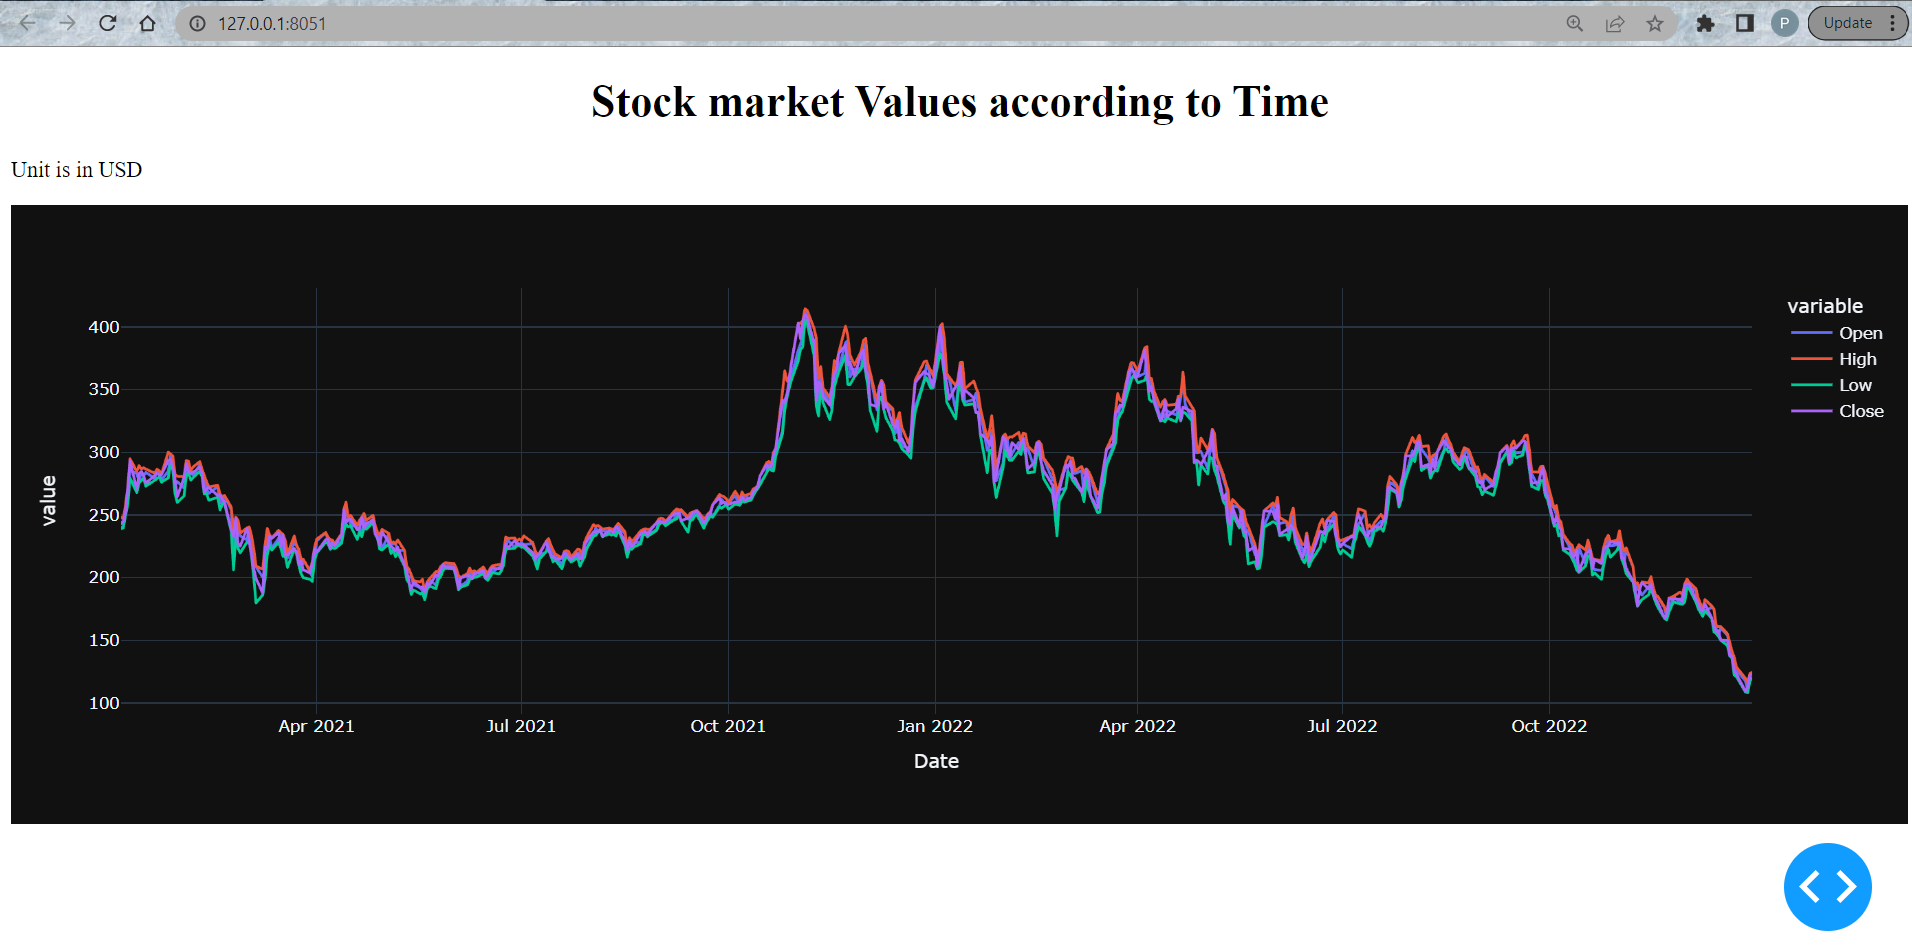

In [26]:
#create interactive line plot with dropdown menu for selecting between different target features
DASH.Dash_dropdown_OHLC()

Dash app running on http://127.0.0.1:8051/


Default value when app starts

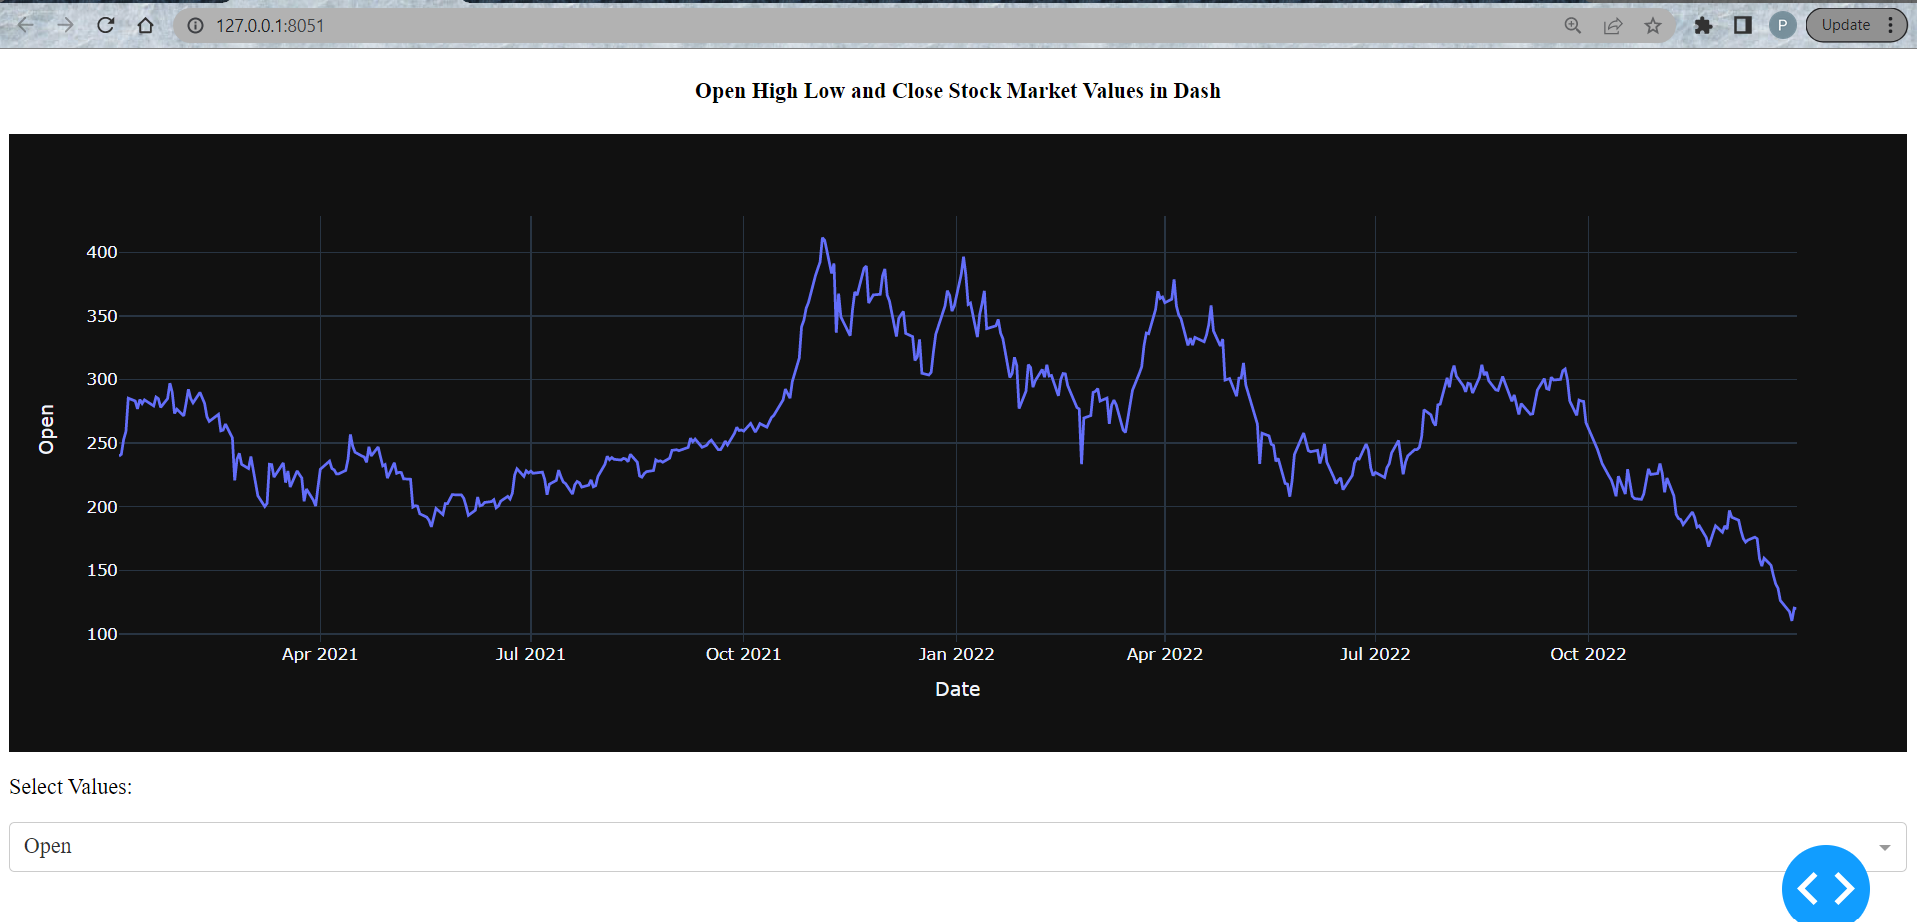

Selecting High from the dropdown menu

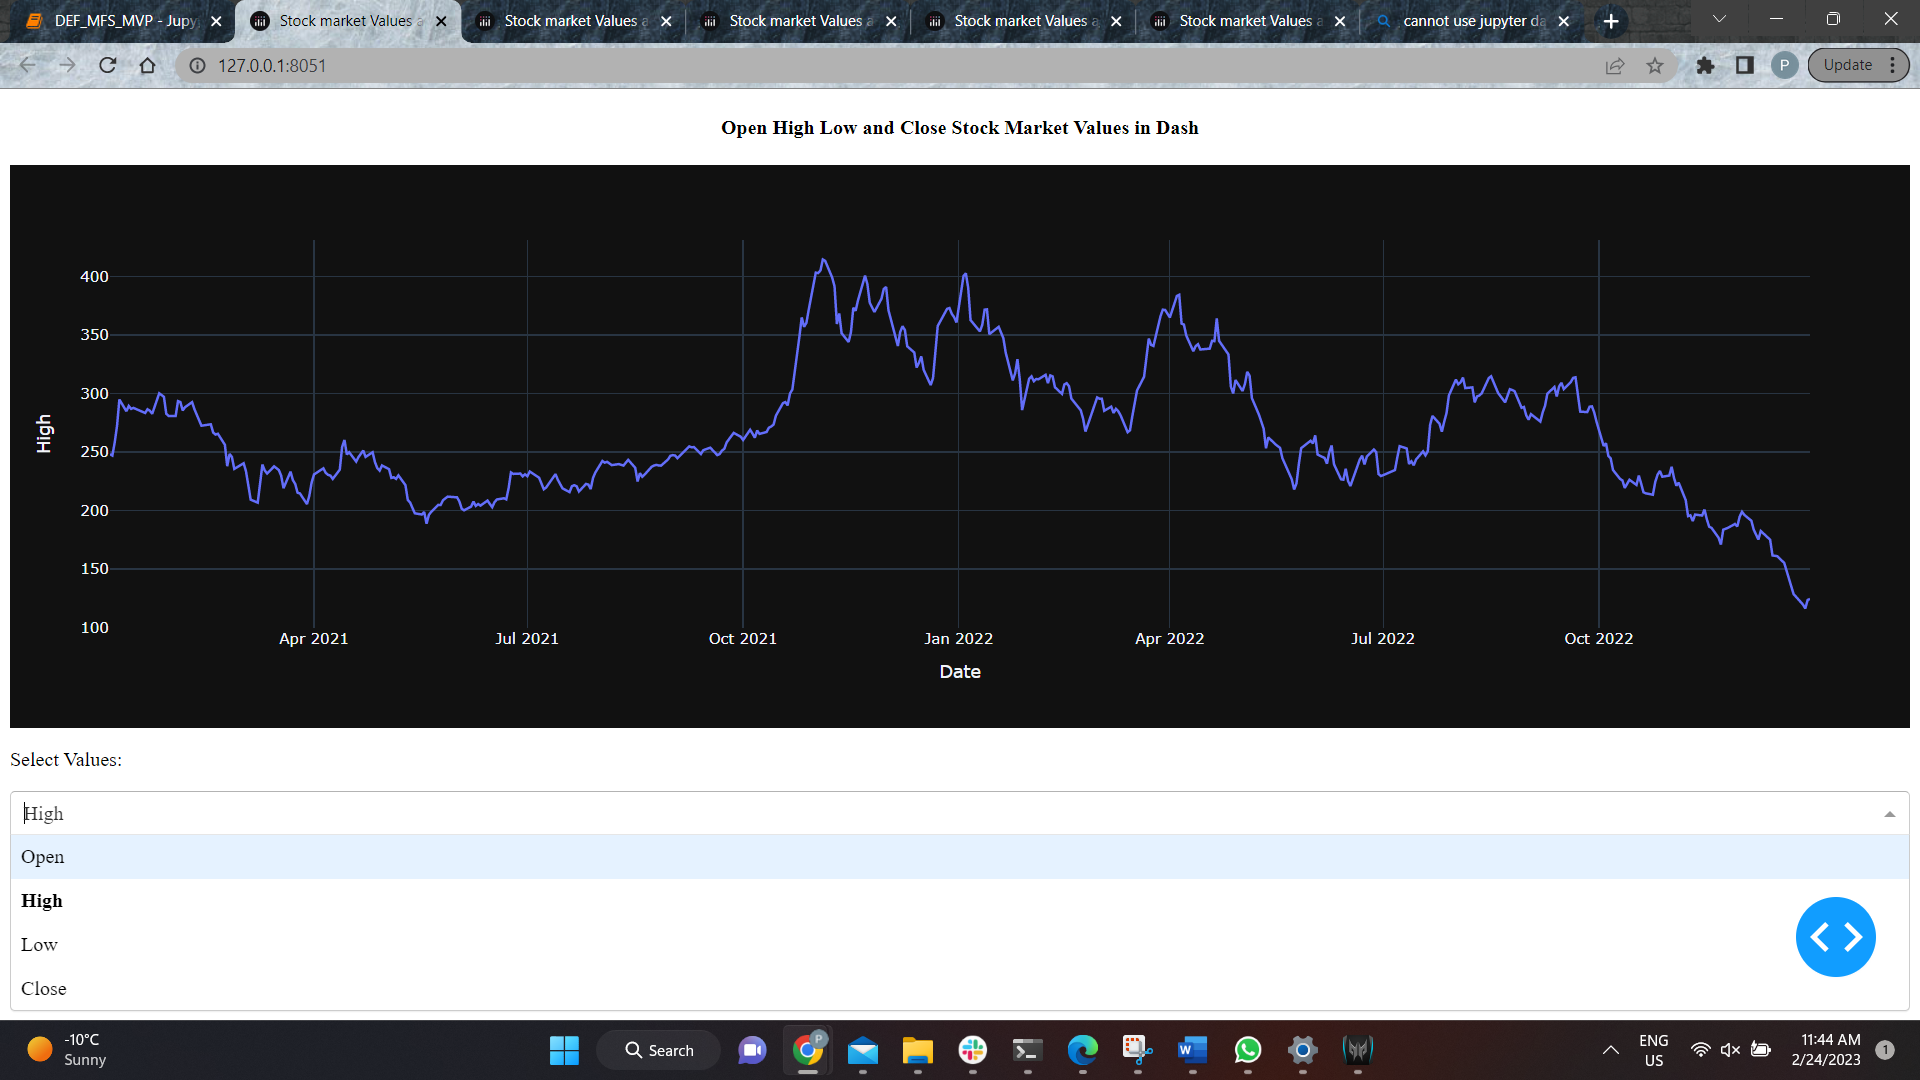

In [27]:
#create interactive line plot with checklist such that plots for target feature will be displayed based on the options selected
DASH.DASH_checklist_OHLC()

Dash app running on http://127.0.0.1:8051/


Lineplot on Dash when app is stated and Open values displayed in default

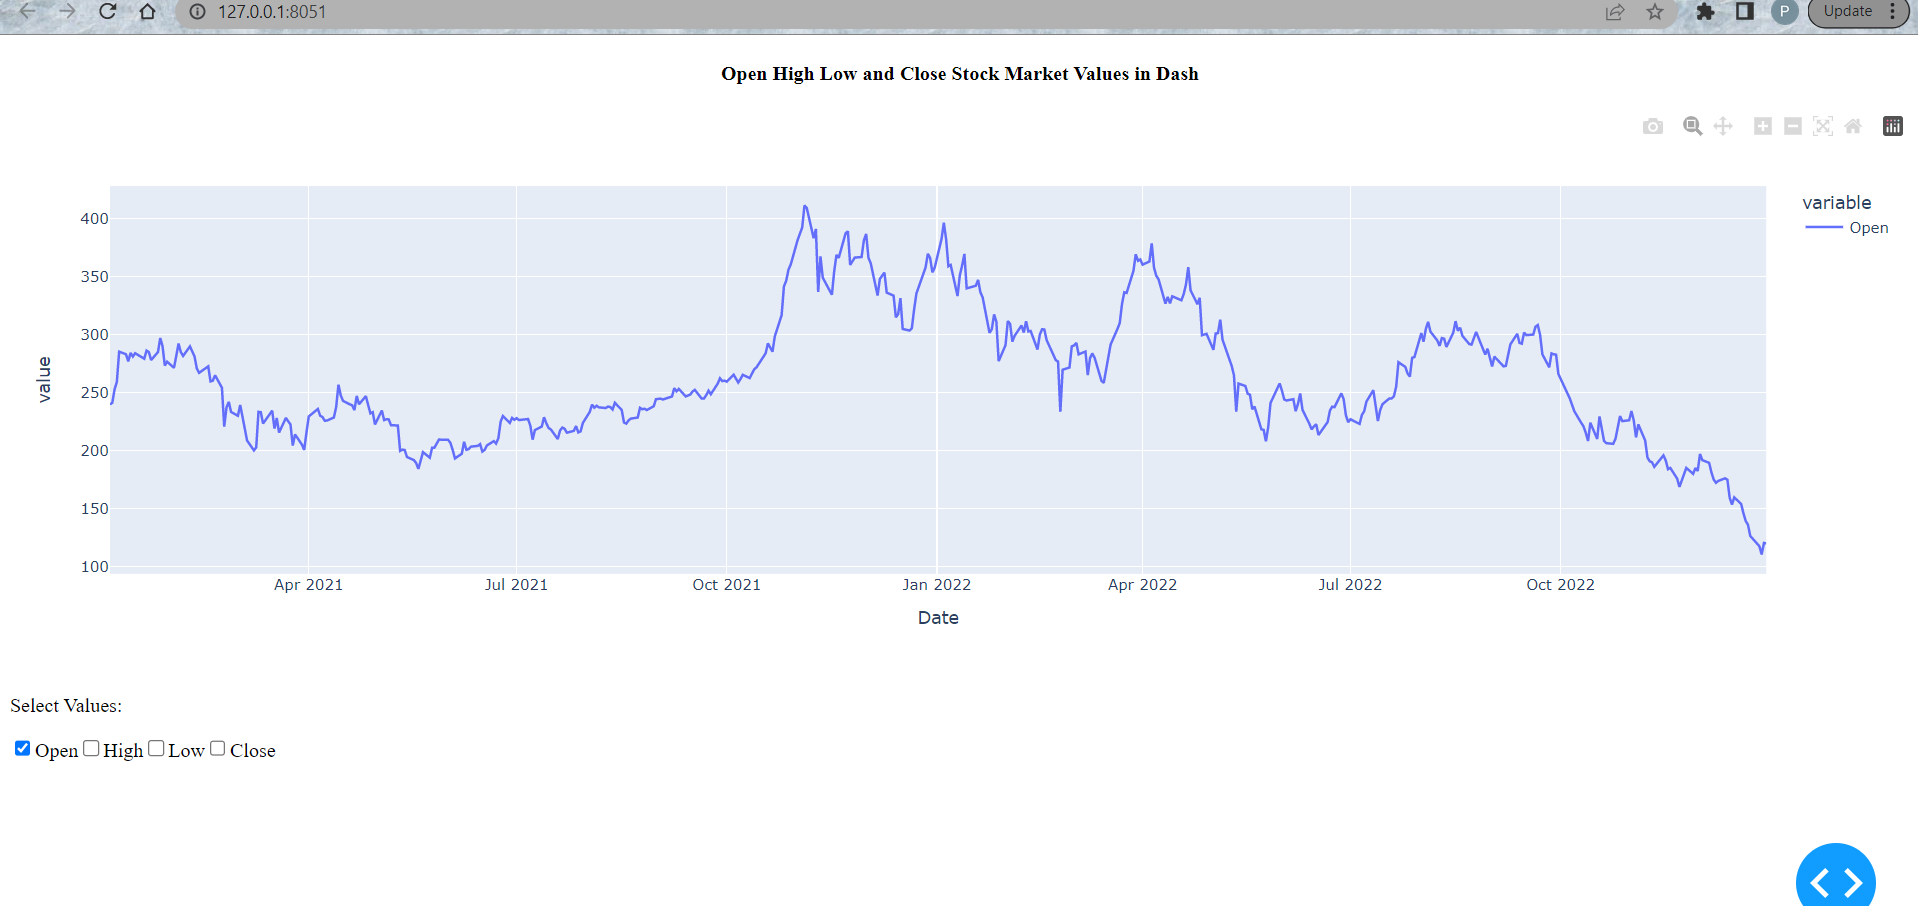

When checklist options Open, Close and Low selected

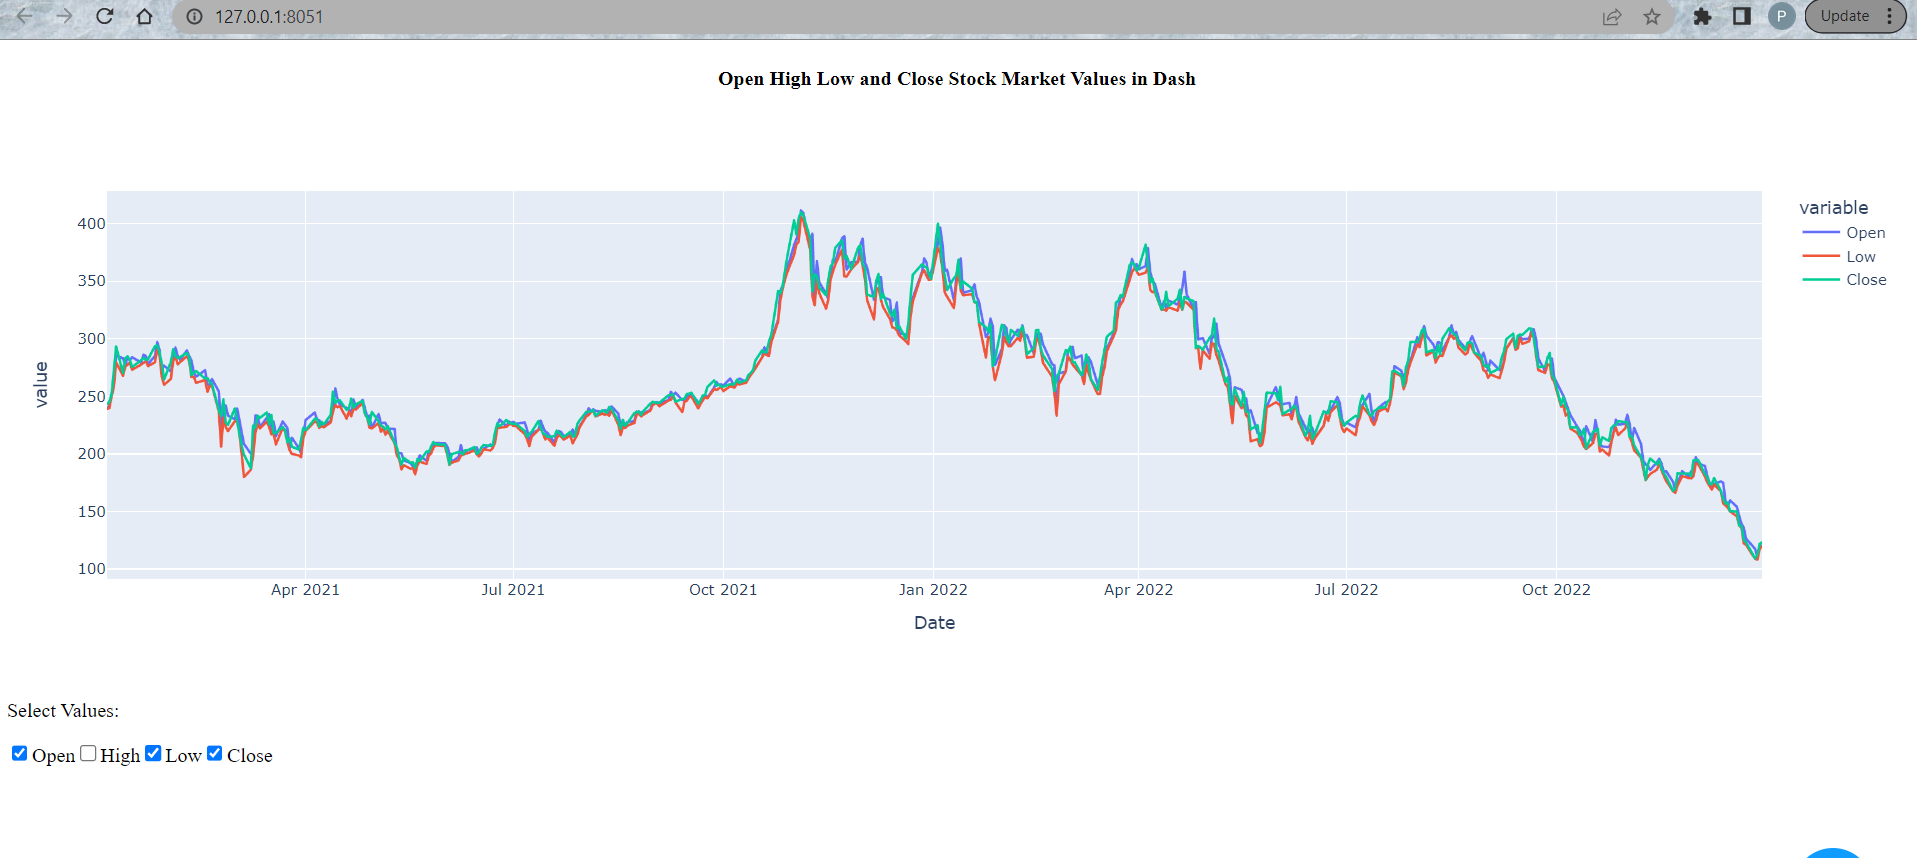

In [28]:
#create candlestick graph to display open, high, low and close values with options to toggle range slider on and off

In [29]:
DASH.DASH_candlestick()

Dash app running on http://127.0.0.1:8051/


Candlestick chart with rangesider checked on default

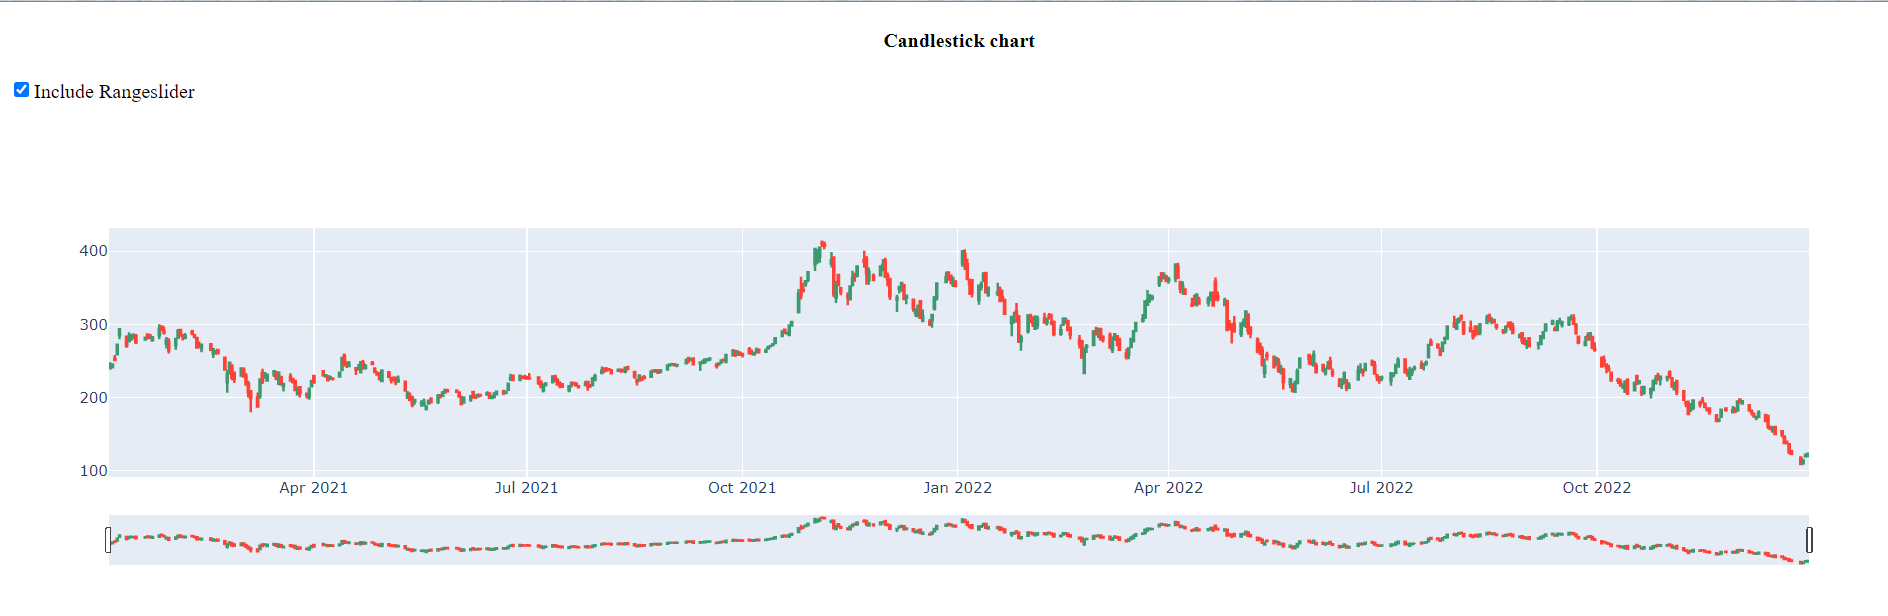

Candlestick chart with rangeslider unchecked


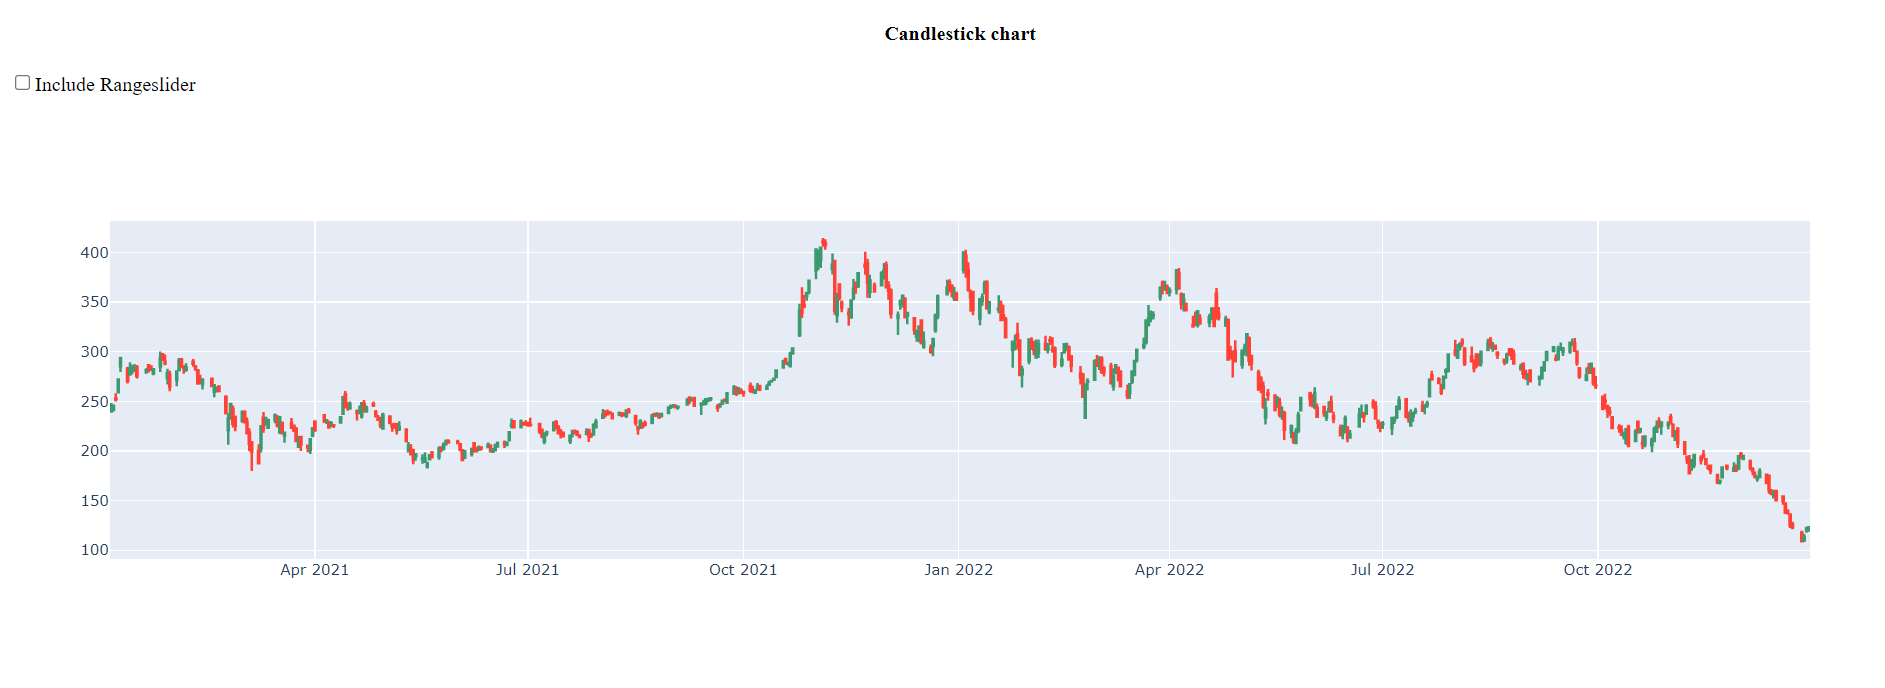

In [30]:
#create lineplots and candlestick plot with dropdowns and checklist on Dash dashboard 

In [31]:
class Interactive_StockPrices:
    
    #class constructor
    def __init__(self,df_tesla,df_ford):
        self.df_tesla=df_tesla
        self.df_ford=df_ford
        
    def Dash_Stocks(self):
        #create dash application
        app = JupyterDash(__name__)
        #to describe what app looks like we setup its layout
        #html.Div-our main container
        app.layout =html.Div([
            #html header
            html.H1('Open High Low and Close Stock Market Values in Dash',style={'text-align':'center'}),
            #html paragraph
            html.P("Select Ticker:"),
            #dash core components- dcc allows us to create interactive components like graphs, dropdown menus, or date ranges
            #to enable dropdowns in dash
            dcc.Dropdown(
                id = 'graph-type',
                #title
                placeholder='Select Stock',
                #options to choose from
                options= [
                    {'label' : 'Tesla', 'value' : 'Tesla'},
                    {'label' : 'Ford', 'value' : 'Ford'}
                ],
                #default value when app starts
                value="Tesla"
            ),
            # to render any plotly-powered data visualization
            dcc.Graph(
                id='graph'
            ),
            #to render set of checkbox
            dcc.Checklist(
                id='toggle-rangeslider',
                options=[{'label': 'Include Rangeslider', 
                          'value': 'slider'}],
                value=['slider'],
            ),
            #P object for paragraph-"Select Values" which gets rendered by dash as html element
            html.P("Select Values:"),
            dcc.Checklist(
                #we define a list of options to choose from
                options=[
                    {"label": "Open", "value": "Open"},
                    {"label": "High", "value": "High"},
                    {"label": "Low", "value": "Low"},
                    {"label": "Close", "value": "Close"},
                ],
                value=["Open"],
                id="checklist",
            ),
        ])
        @app.callback(
            Output('graph', 'figure'),
            [Input('graph-type', 'value'),Input('checklist', 'value'),Input('toggle-rangeslider', 'value')]
        )
        def choose_graph_type(graph_type,checklist,rangeslider):
            if graph_type is None:
                raise dash.exceptions.PreventUpdate()
            if graph_type == 'Tesla':
                fig=px.line(df_from_db_tesla, x='Date', y=checklist)
                fig.update_layout(template="presentation",xaxis_rangeslider_visible='slider' in rangeslider)
                return fig
            elif graph_type == 'Ford':
                fig=px.line(df_from_db_ford, x='Date', y=checklist)
                fig.update_layout(template="presentation",xaxis_rangeslider_visible='slider' in rangeslider)
                return fig
            return None


        app.run_server(debug=True)

In [32]:
ISP=Interactive_StockPrices(df_from_db_tesla,df_from_db_ford)

In [33]:
ISP.Dash_Stocks()

Dash app running on http://127.0.0.1:8050/


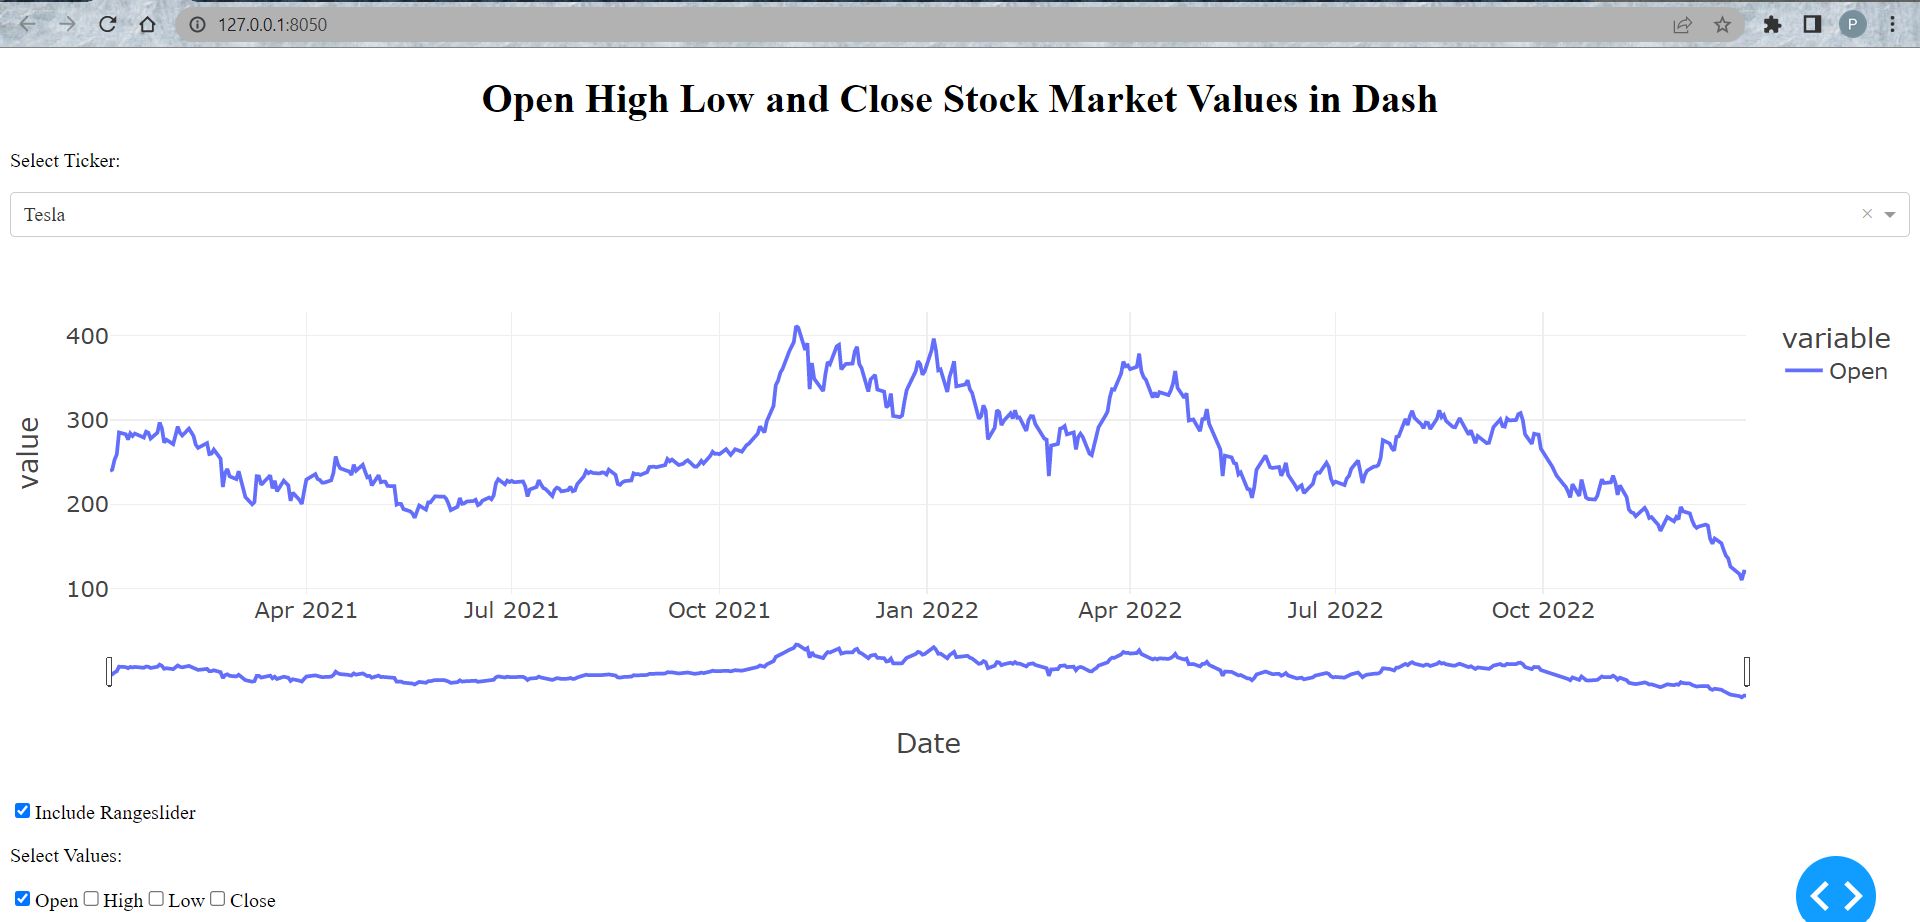
